In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import KernelPCA, PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:

#Load lung.csv file
df = pd.read_csv("Lung.csv")

#check import by printing first few values
df.head()


,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-9500,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b,Label
0,7314.747386,7391.483138,7334.393081,10994.201497,471.496698,318.193106,1156.241547,3272.099771,3363.611772,442.783758,...,3.022415,0.0,0.000000,1.847031,0,40.298863,35.429417,148.602058,12118.707689,1
1,9518.042994,9460.443528,9574.874468,17578.281899,785.810318,358.652676,771.986446,3871.452122,3917.224498,487.829079,...,6.451140,0.0,128.562009,4.607957,0,8.601520,38.860440,111.512567,7471.802757,1
2,4479.976340,4387.407628,4447.955716,12394.310110,404.624244,855.241747,246.267705,1353.016896,1415.311564,416.850300,...,2.910966,0.0,161.267504,1.746579,0,33.767203,31.438430,168.253822,16026.613214,1
3,21277.962603,21166.590502,21255.800397,15161.474118,6684.570363,503.278464,2185.922959,15012.229891,14987.262342,1107.549261,...,6.452288,0.0,1.683206,10.660302,0,5.049617,95.101114,1416.978551,12750.562682,1
4,8002.355461,8013.396682,8033.638922,19358.942067,1276.411235,765.754731,593.005616,2630.801098,2649.433160,367.580673,...,9.201018,0.0,97.990843,3.450382,0,22.772520,46.235116,455.450396,14401.203493,1


In [3]:
print(df.shape)

(1091, 1882)


In [4]:
df_data = df.iloc[:, :-1].to_numpy()
df_labels = df.iloc[:, -1].to_numpy()

In [5]:
#split data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(df_data, df_labels, test_size=0.2)

#use SVM to classify cancer data
svm = SVC()
svm.fit(X_train, Y_train) #train svm classifier

#Make predictions
y_pred_svm=svm.predict(X_test)

#Get accuracy score
print(accuracy_score(Y_test, y_pred_svm))

0.5342465753424658


In [6]:
#Use PCA dimensionality reduction + SVM classifier

pca = PCA(n_components=2)
pca.fit(X_train)

#reduced dimensionality of training data
X_train_reduced = pca.transform(X_train)

#reduced dimensionality of testing data
X_test_reduced = pca.transform(X_test)

#Use SVM as classifier on reduced dimensions

#use SVM to classify cancer data
svm = SVC()
svm.fit(X_train_reduced, Y_train) #train svm classifier

#Make predictions
y_pred_svm=svm.predict(X_test_reduced)

#Get accuracy score
print(accuracy_score(Y_test, y_pred_svm))

0.5342465753424658


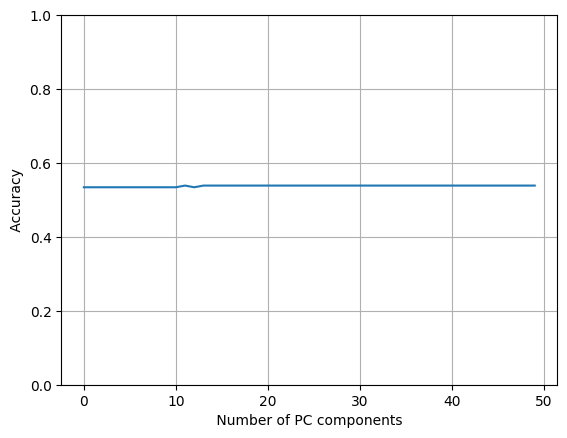

In [7]:
#create testing loop for different number of components
"""
1.2 PCA using scikit-learn:
a. Use the PCA module from sklearn to perform dimensionality reduction on the dataset.

b. Compare the results with your from-scratch implementation in terms of explained variance and the reduced feature set.
"""

accu = []
for i in range(1,51):
    pca = PCA(n_components=i)
    pca.fit(X_train)
    
    #reduced dimensionality of training data
    X_train_reduced = pca.transform(X_train)
    
    #reduced dimensionality of testing data
    X_test_reduced = pca.transform(X_test)
    
    #Use SVM as classifier on reduced dimensions
    
    #use SVM to classify cancer data
    svm = SVC()
    svm.fit(X_train_reduced, Y_train) #train svm classifier
    
    #Make predictions
    y_pred_svm=svm.predict(X_test_reduced)
    
    #Get accuracy score
    accu.append(accuracy_score(Y_test, y_pred_svm))

plt.plot(accu)
plt.ylim((0,1))
plt.xlabel(' Number of PC components ')
plt.ylabel(' Accuracy ')
plt.grid()

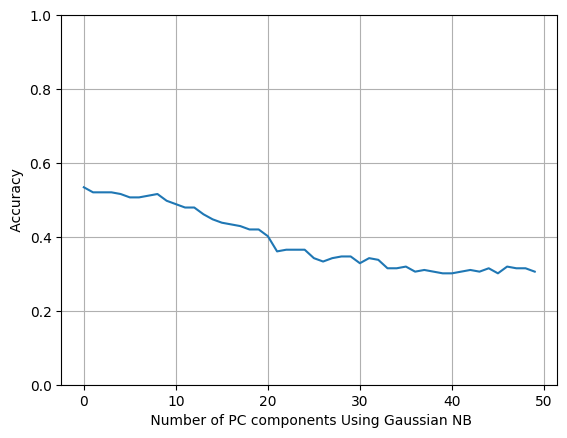

In [8]:
#use PCA as dimensionality reduction + naive bayes classifier
from sklearn.naive_bayes import GaussianNB

accu = []
for i in range(1,51):
    pca = PCA(n_components=i)
    pca.fit(X_train)
    
    #reduced dimensionality of training data
    X_train_reduced = pca.transform(X_train)
    
    #reduced dimensionality of testing data
    X_test_reduced = pca.transform(X_test)
    
    #Use SVM as classifier on reduced dimensions
    
    #use GaussianNB to classify cancer data
    NB = GaussianNB()
    NB.fit(X_train_reduced, Y_train) #train svm classifier
    
    #Make predictions
    y_pred_NB=NB.predict(X_test_reduced)
    
    #Get accuracy score
    accu.append(accuracy_score(Y_test, y_pred_NB))

plt.plot(accu)
plt.ylim((0,1))
plt.xlabel(' Number of PC components Using Gaussian NB')
plt.ylabel(' Accuracy ')
plt.grid()

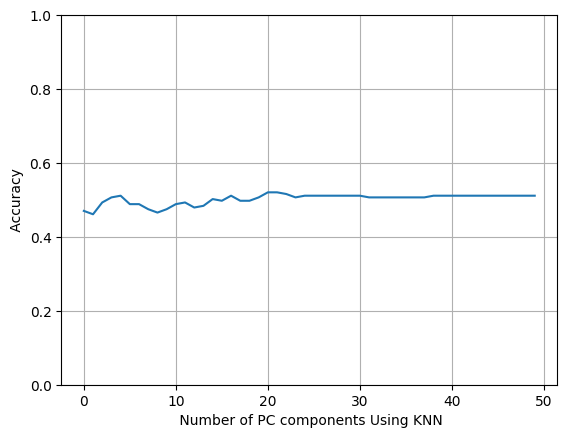

In [9]:
#use KNN as dimensionality reduction + nearest neighbor classifier

from sklearn.neighbors import KNeighborsClassifier

accu = []
for i in range(1,51):
    pca = PCA(n_components=i)
    pca.fit(X_train)
    
    #reduced dimensionality of training data
    X_train_reduced = pca.transform(X_train)
    
    #reduced dimensionality of testing data
    X_test_reduced = pca.transform(X_test)
    
    #Use SVM as classifier on reduced dimensions
    
    #use GaussianNB to classify cancer data
    KNN = KNeighborsClassifier(n_neighbors=5)
    KNN.fit(X_train_reduced, Y_train) #train svm classifier
    
    #Make predictions
    y_pred_KNN=KNN.predict(X_test_reduced)
    
    #Get accuracy score
    accu.append(accuracy_score(Y_test, y_pred_KNN))

plt.plot(accu)
plt.ylim((0,1))
plt.xlabel(' Number of PC components Using KNN')
plt.ylabel(' Accuracy ')
plt.grid()

In [10]:
"""
a. Write Python code to implement PCA from scratch. Include 
functions to compute the covariance matrix, eigenvalues, and eigenvectors.
"""

def cov_matrix(data, pop=True):
    """cov_matrix(data)
    find the covariance matrix for the dataframe, data
    """
    #check for undefined rows
    #und_rows =  [col for col in df.columns if df[col].astype(str).str.contains(r'\?').any()]
    #get the mean vector
    mean_vector = data.mean()
    center_data = data - mean_vector
    column_labels = data.columns
    n = data.shape[0]
    if(not pop):
        n = n-1
    output_matrix = 1/n*np.dot(center_data.T, center_data)
    output_df = pd.DataFrame(output_matrix, columns=column_labels, index=column_labels)
    return output_df

#test the cov_matrix function, False is for sample covariance matrix, True is for population covariance matrix
c_df= cov_matrix(df, False)
c_df.head()

,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-9500,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b,Label
hsa-let-7a-1,3.641320e+07,3.637542e+07,3.639032e+07,4.112200e+07,3.710949e+06,1.755833e+06,3.409256e+06,2.005272e+07,2.020463e+07,903655.803019,...,-10129.755164,-73.982899,-202839.113567,-3971.945939,0.0,-61107.278184,20985.145853,205735.353675,1.371708e+07,-50.502430
hsa-let-7a-2,3.637542e+07,3.634473e+07,3.635571e+07,4.094996e+07,3.690827e+06,1.749264e+06,3.410033e+06,2.003919e+07,2.019103e+07,902889.877337,...,-10094.388689,-74.726476,-203885.830302,-3957.331966,0.0,-61130.548602,20902.832617,202655.549144,1.358411e+07,-51.754444
hsa-let-7a-3,3.639032e+07,3.635571e+07,3.637426e+07,4.127538e+07,3.714768e+06,1.775517e+06,3.407406e+06,2.001464e+07,2.016643e+07,902087.337423,...,-10072.547200,-73.695632,-202636.345847,-3960.552999,0.0,-60959.393944,21210.179471,204431.666529,1.398660e+07,-53.224142
hsa-let-7b,4.112200e+07,4.094996e+07,4.127538e+07,2.218798e+08,1.133444e+07,1.525216e+07,1.805034e+06,2.197381e+06,2.131908e+06,-28842.534524,...,-10467.324849,-80.659226,-158657.069888,-7199.007118,0.0,-95466.197157,-65822.447194,534499.532745,2.229425e+08,-93.746953
hsa-let-7c,3.710949e+06,3.690827e+06,3.714768e+06,1.133444e+07,2.794143e+06,8.547153e+05,2.486303e+05,1.186124e+06,1.191719e+06,36027.247362,...,-199.996249,-1.423990,10974.611886,-505.635712,0.0,-4134.715027,5570.581917,515870.532058,1.458928e+07,-58.569430


In [11]:
#used built in cov() function to verify function works properly. 
c_dfauto = df.cov()
c_dfauto.head()

,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-9500,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b,Label
hsa-let-7a-1,3.641320e+07,3.637542e+07,3.639032e+07,4.112200e+07,3.710949e+06,1.755833e+06,3.409256e+06,2.005272e+07,2.020463e+07,903655.803019,...,-10129.755164,-73.982899,-202839.113567,-3971.945939,0.0,-61107.278184,20985.145853,205735.353675,1.371708e+07,-50.502430
hsa-let-7a-2,3.637542e+07,3.634473e+07,3.635571e+07,4.094996e+07,3.690827e+06,1.749264e+06,3.410033e+06,2.003919e+07,2.019103e+07,902889.877337,...,-10094.388689,-74.726476,-203885.830302,-3957.331966,0.0,-61130.548602,20902.832617,202655.549144,1.358411e+07,-51.754444
hsa-let-7a-3,3.639032e+07,3.635571e+07,3.637426e+07,4.127538e+07,3.714768e+06,1.775517e+06,3.407406e+06,2.001464e+07,2.016643e+07,902087.337423,...,-10072.547200,-73.695632,-202636.345847,-3960.552999,0.0,-60959.393944,21210.179471,204431.666529,1.398660e+07,-53.224142
hsa-let-7b,4.112200e+07,4.094996e+07,4.127538e+07,2.218798e+08,1.133444e+07,1.525216e+07,1.805034e+06,2.197381e+06,2.131908e+06,-28842.534524,...,-10467.324849,-80.659226,-158657.069888,-7199.007118,0.0,-95466.197157,-65822.447194,534499.532745,2.229425e+08,-93.746953
hsa-let-7c,3.710949e+06,3.690827e+06,3.714768e+06,1.133444e+07,2.794143e+06,8.547153e+05,2.486303e+05,1.186124e+06,1.191719e+06,36027.247362,...,-199.996249,-1.423990,10974.611886,-505.635712,0.0,-4134.715027,5570.581917,515870.532058,1.458928e+07,-58.569430


In [12]:
#PCA function written from scratch

def pca_scratch(data, k):
    #data = data.to_numpy()
    #center the data
    data_mean = np.mean(data)
    data_center = data-data_mean
    #find covariance matrix
    cov_matrix = np.cov(data_center, rowvar=False)
    #find eigenvalues and eigenmatrix
    eig_values, eig_vectors = np.linalg.eigh(cov_matrix)
    idx = np.argsort(eig_values)[:-1]
    eig_values = eig_values[idx]
    eig_vectors = eig_vectors[:, idx]
    red_eig_vect = eig_vectors[:, :k]
    projected_data = np.dot(data_center,red_eig_vect)
    return projected_data, data_mean, red_eig_vect
    


In [13]:
#apply PCA function

projected_X_train, mean1, reduced_eig_vectors = pca_scratch(X_train, 4)
X_test_centered = X_test-mean1
projected_X_test = np.dot(X_test_centered, reduced_eig_vectors)

#Use naive Bayes Classifier
NB = GaussianNB()
NB.fit(projected_X_train, Y_train)
Y_pred_NB = NB.predict(projected_X_test)
print(accuracy_score(Y_test, Y_pred_NB))

0.2009132420091324


In [14]:
#Bayes Classifier Class

import numpy as np
class BayesClassifier:
    def __init__(self):
        self.classes = None
        self.priors = None
        self.mean = None
        self.variance = None

    def fit(self, X, y):
        """
        Train the Bayes classifier.

        Parameters:
        X: np.ndarray
            Feature matrix of shape (n_samples, n_features)
        y: np.ndarray
            Class labels of shape (n_samples,)
        """

        self.classes = np.unique(y)
        n_features = X.shape[1]
        n_classes = len(self.classes)

        #Initialize arrays to store class-wise statistics
        self.mean = np.zeros((n_classes, n_features))
        self.variance = np.zeros((n_classes, n_features))
        self.priors = np.zeros(n_classes)

        for idx, cls in enumerate(self.classes):
            X_c = X[y == cls]
            self.mean[idx, :] = X_c.mean(axis=0)
            self.variance[idx, :] = X_c.var(axis=0)
            self.priors[idx] = X_c.shape[0] / float(X.shape[0])

    def _calculate_likelihood(self, mean, var, x):
        """
        Calculate the Gaussian likelihood of the data.
        """
        #Add small epsilon to variance to avoid division by 0
        eps = 1e-6
        coeff = 1 / np.sqrt(2 * np.pi * (var + eps))
        exponent = -((x - mean) ** 2) / (2 * (var + eps))
        return coeff * np.exp(exponent)

    def _calculate_posterior(self, X):
        """
        Calculate posterior probability for each class
        """

        posteriors = []
        for idx, cls in enumerate(self.classes):
            prior = np.log(self.priors[idx])
            likelihood = np.sum(np.log(self._calculate_likelihood(self.mean[idx, :], self.variance[idx, :], X)), axis=1)
            posteriors.append(prior + likelihood)
        return np.array(posteriors).T

    def predict(self, X):
        """
        Predict class labels for input data.
        """
        posteriors = self._calculate_posterior(X)
        return self.classes[np.argmax(posteriors, axis=1)]
            

In [15]:
#test bayes classifier

B = BayesClassifier()
B.fit(X_train, Y_train)
y_pred=B.predict(X_test)
print(accuracy_score(Y_test,y_pred))

0.1872146118721461


C:\Users\SGarcia\AppData\Local\Temp\ipykernel_17144\1333744638.py:55: RuntimeWarning: divide by zero encountered in log
  likelihood = np.sum(np.log(self._calculate_likelihood(self.mean[idx, :], self.variance[idx, :], X)), axis=1)


In [16]:
#apply dimensionality reduction using kernal PCA + "rbf" + Naive Bayes Classifer

kpca = KernelPCA(n_components=4, kernel='rbf')
kpca.fit(X_train)
X_train_reduced=kpca.transform(X_train)
X_test_reduced=kpca.transform(X_test)
print(X_train_reduced.shape)
print(X_test_reduced.shape)

(872, 4)
(219, 4)


In [ ]:

#KPCA classifier
accu = []
for i in range(1,10):
    kpca = KernelPCA(n_components=i, kernel='rbf')
    try:
        kpca.fit(X_train)
    except Exception as e:
        print(f"Skipped iteration {i} due to {e}")
    
    #reduced dimensionality of training data
    X_train_reduced = kpca.transform(X_train)
    
    #reduced dimensionality of testing data
    X_test_reduced = kpca.transform(X_test)
    
    #Use Gaussian_NB as classifier on reduced dimensions

    NB = GaussianNB()
    NB.fit(X_train_reduced, Y_train) #train svm classifier
    
    #Make predictions
    y_pred_NB=NB.predict(X_test_reduced)
    
    #Get accuracy score
    accu.append(accuracy_score(Y_test, y_pred_NB))

plt.plot(accu)
plt.ylim((0,1))
plt.xlabel(' Number of PC components ')
plt.ylabel(' Accuracy ')
plt.grid()

In [ ]:
PCAtest = PCA(n_components = 5)
PCAtest.fit(df_data)
PCAtest_data = PCAtest.transform(df_data)
print(PCAtest_data)
    

In [ ]:
def eigenv(data):
    #copy df dataframe to ensure same size
    i_data = data.copy()
    #set all values to 0 in dataframe
    i_data.loc[:,:] = 0
    #conver to numpy array
    i_arr = i_data.to_numpy()
    #set diagonals to 1 to get identity matrix
    np.fill_diagonal(i_arr, 1)
    #conver data to numpy array
    arr = data.to_numpy()
    
    return eigen_vals